In [1]:
import missingno as msno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from mlxtend.plotting import plot_decision_regions
import missingno as msno
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
diabetes_df=pd.read_csv('diabetes3.csv')

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
# exploring data analysis(EDA)
# total number of columns in the dataset
diabetes_df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# information about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2768 non-null   int64  
 1   Glucose                   2768 non-null   int64  
 2   BloodPressure             2768 non-null   int64  
 3   SkinThickness             2768 non-null   int64  
 4   Insulin                   2768 non-null   int64  
 5   BMI                       2768 non-null   float64
 6   DiabetesPedigreeFunction  2768 non-null   float64
 7   Age                       2768 non-null   int64  
 8   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 194.8 KB


In [6]:
# to know more about dataset
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
#to know more about dataset with transpose
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2768.0,3.742775,3.323801,0.000,1.000,3.000,6.000,17.00
Glucose,2768.0,121.102601,32.036508,0.000,99.000,117.000,141.000,199.00
BloodPressure,2768.0,69.134393,19.231438,0.000,62.000,72.000,80.000,122.00
SkinThickness,2768.0,20.824422,16.059596,0.000,0.000,23.000,32.000,110.00
Insulin,2768.0,80.127890,112.301933,0.000,0.000,37.000,130.000,846.00
BMI,2768.0,32.137392,8.076127,0.000,27.300,32.200,36.625,80.60
DiabetesPedigreeFunction,2768.0,0.471193,0.325669,0.078,0.244,0.375,0.624,2.42
Age,2768.0,33.132225,11.777230,21.000,24.000,29.000,40.000,81.00
Outcome,2768.0,0.343931,0.475104,0.000,0.000,0.000,1.000,1.00


In [8]:
#Checking if there is some null values
diabetes_df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
2763,False,False,False,False,False,False,False,False,False
2764,False,False,False,False,False,False,False,False,False
2765,False,False,False,False,False,False,False,False,False
2766,False,False,False,False,False,False,False,False,False


In [9]:
# checking if there is somenull values or not
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
diabetes_df_copy=diabetes_df.copy(deep=True)
diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI' ]]= diabetes_df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]. replace(0,np.NaN)
#showing the count of NANS
print(diabetes_df_copy.isnull().sum())

Pregnancies                    0
Glucose                       18
BloodPressure                125
SkinThickness                800
Insulin                     1330
BMI                           39
DiabetesPedigreeFunction       0
Age                            0
Outcome                        0
dtype: int64


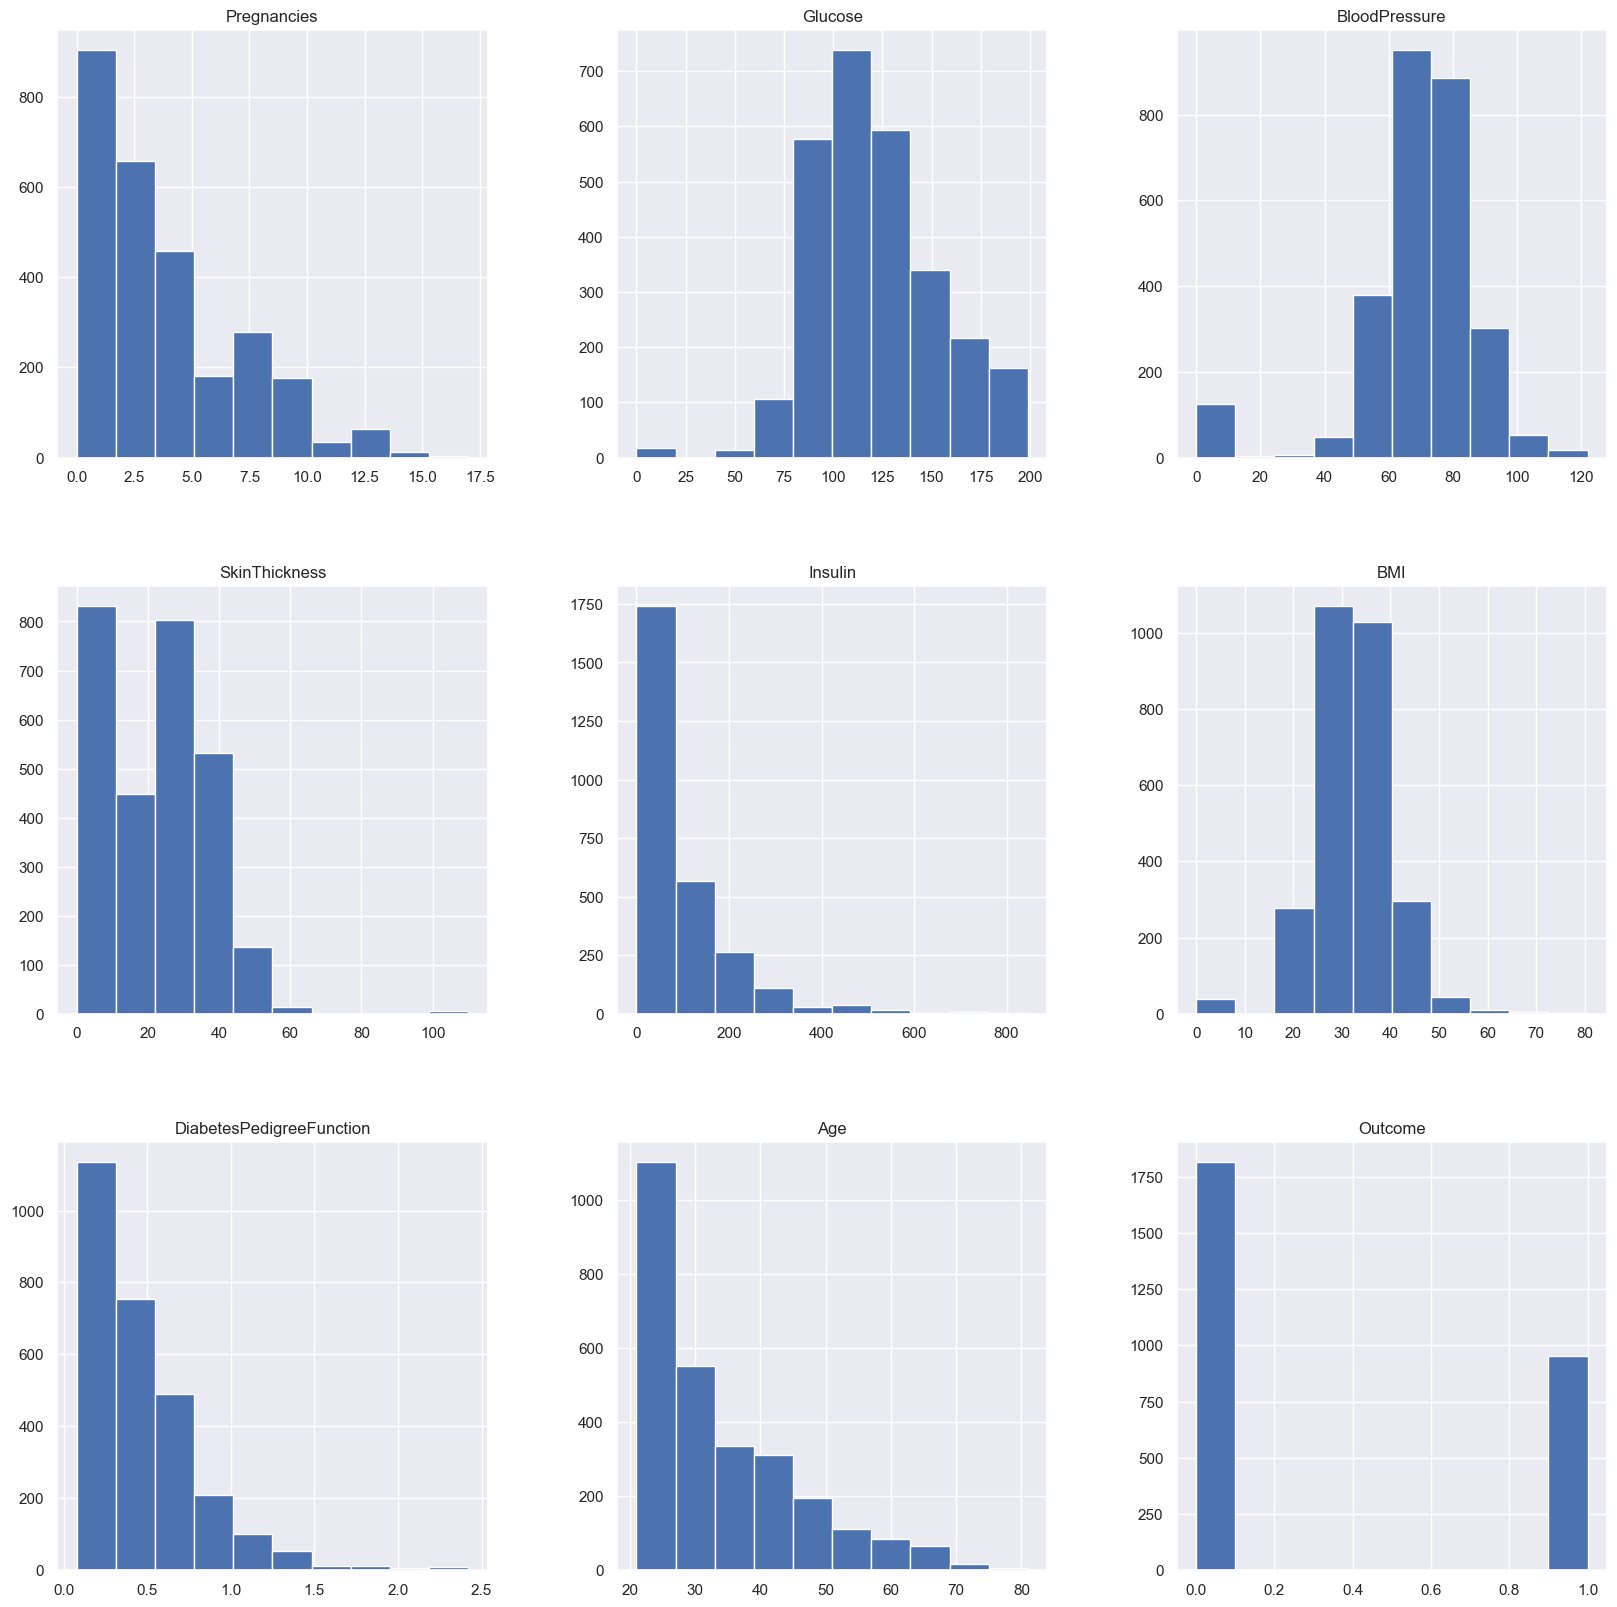

In [11]:
#data visualization
#plotting the data distibution plots
p=diabetes_df.hist(figsize=(20,20))


In [12]:
#aiming to impute the Nan values for the columns in accordance with their distribution 
diabetes_df_copy['Glucose'].fillna(diabetes_df_copy['Glucose'].mean(), inplace=True)
diabetes_df_copy['BloodPressure'].fillna(diabetes_df_copy['BloodPressure'].mean(),inplace=True)
diabetes_df_copy['SkinThickness'].fillna(diabetes_df_copy['SkinThickness'].median(),inplace=True)
diabetes_df_copy['Insulin'].fillna(diabetes_df_copy['Insulin'].median(),inplace=True)
diabetes_df_copy['BMI'].fillna(diabetes_df_copy['BMI'].median(),inplace=True)


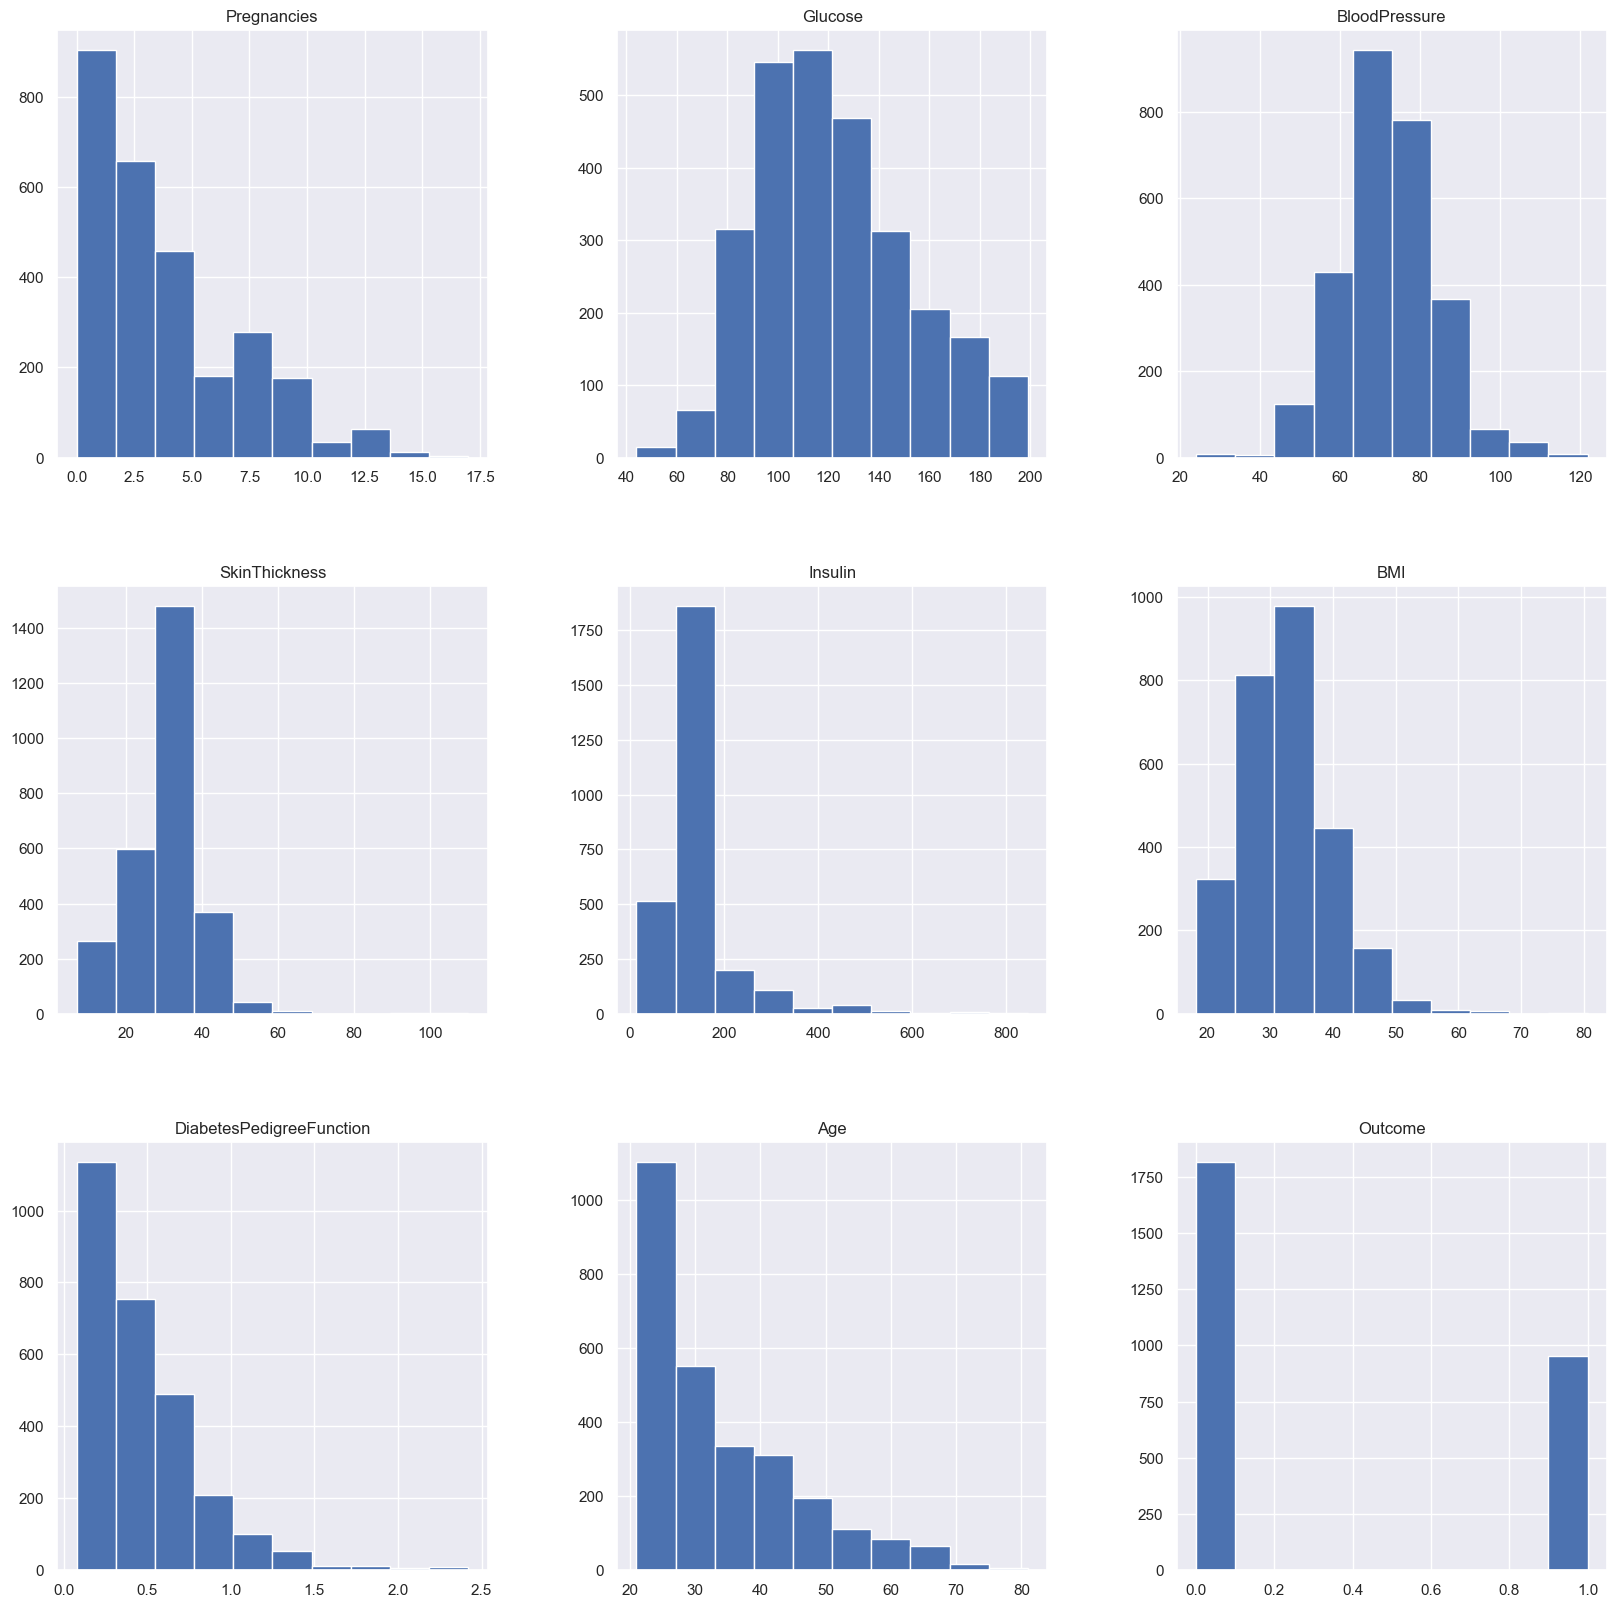

In [13]:
# plotting the distribution after removing the nun values
p=diabetes_df_copy.hist(figsize=(20,20))

In [14]:
diabetes_df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.404086,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0


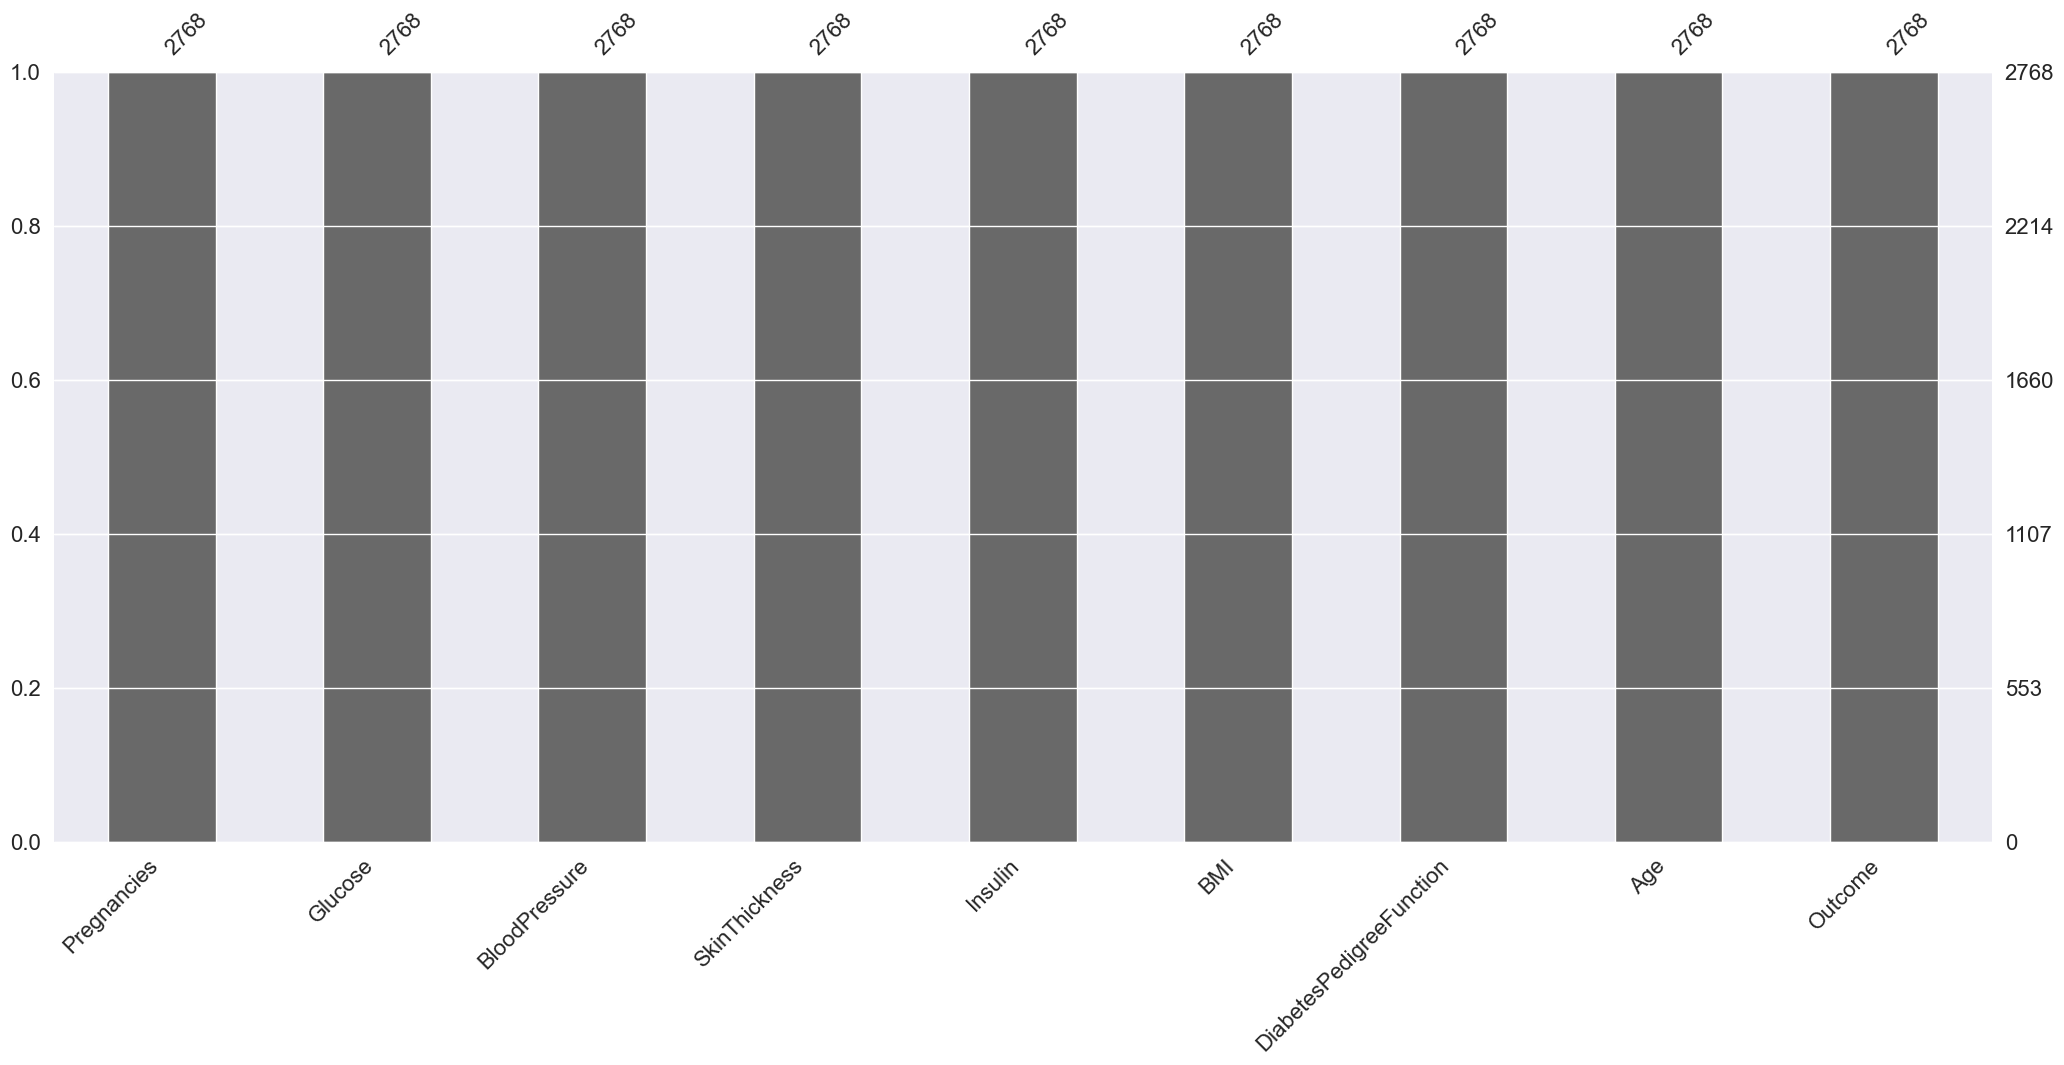

In [15]:
#plottingnull count analysis plot
p=msno.bar(diabetes_df)

0    1816
1     952
Name: Outcome, dtype: int64


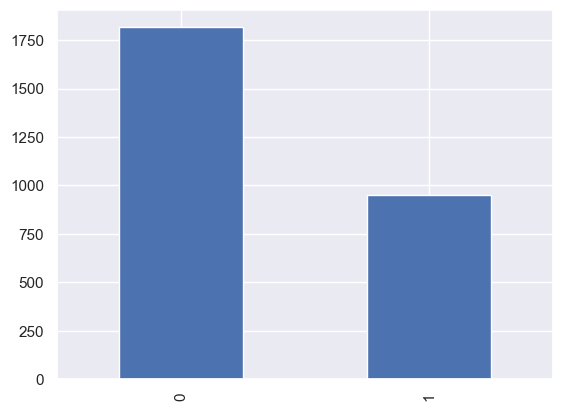

In [16]:
#checking the balance of the data by plotting the count of outcomes by their values
color_wheel={1:"0392cf",2:"#7bc043"}
colors=diabetes_df["Outcome"].map(lambda x:color_wheel.get(x+1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

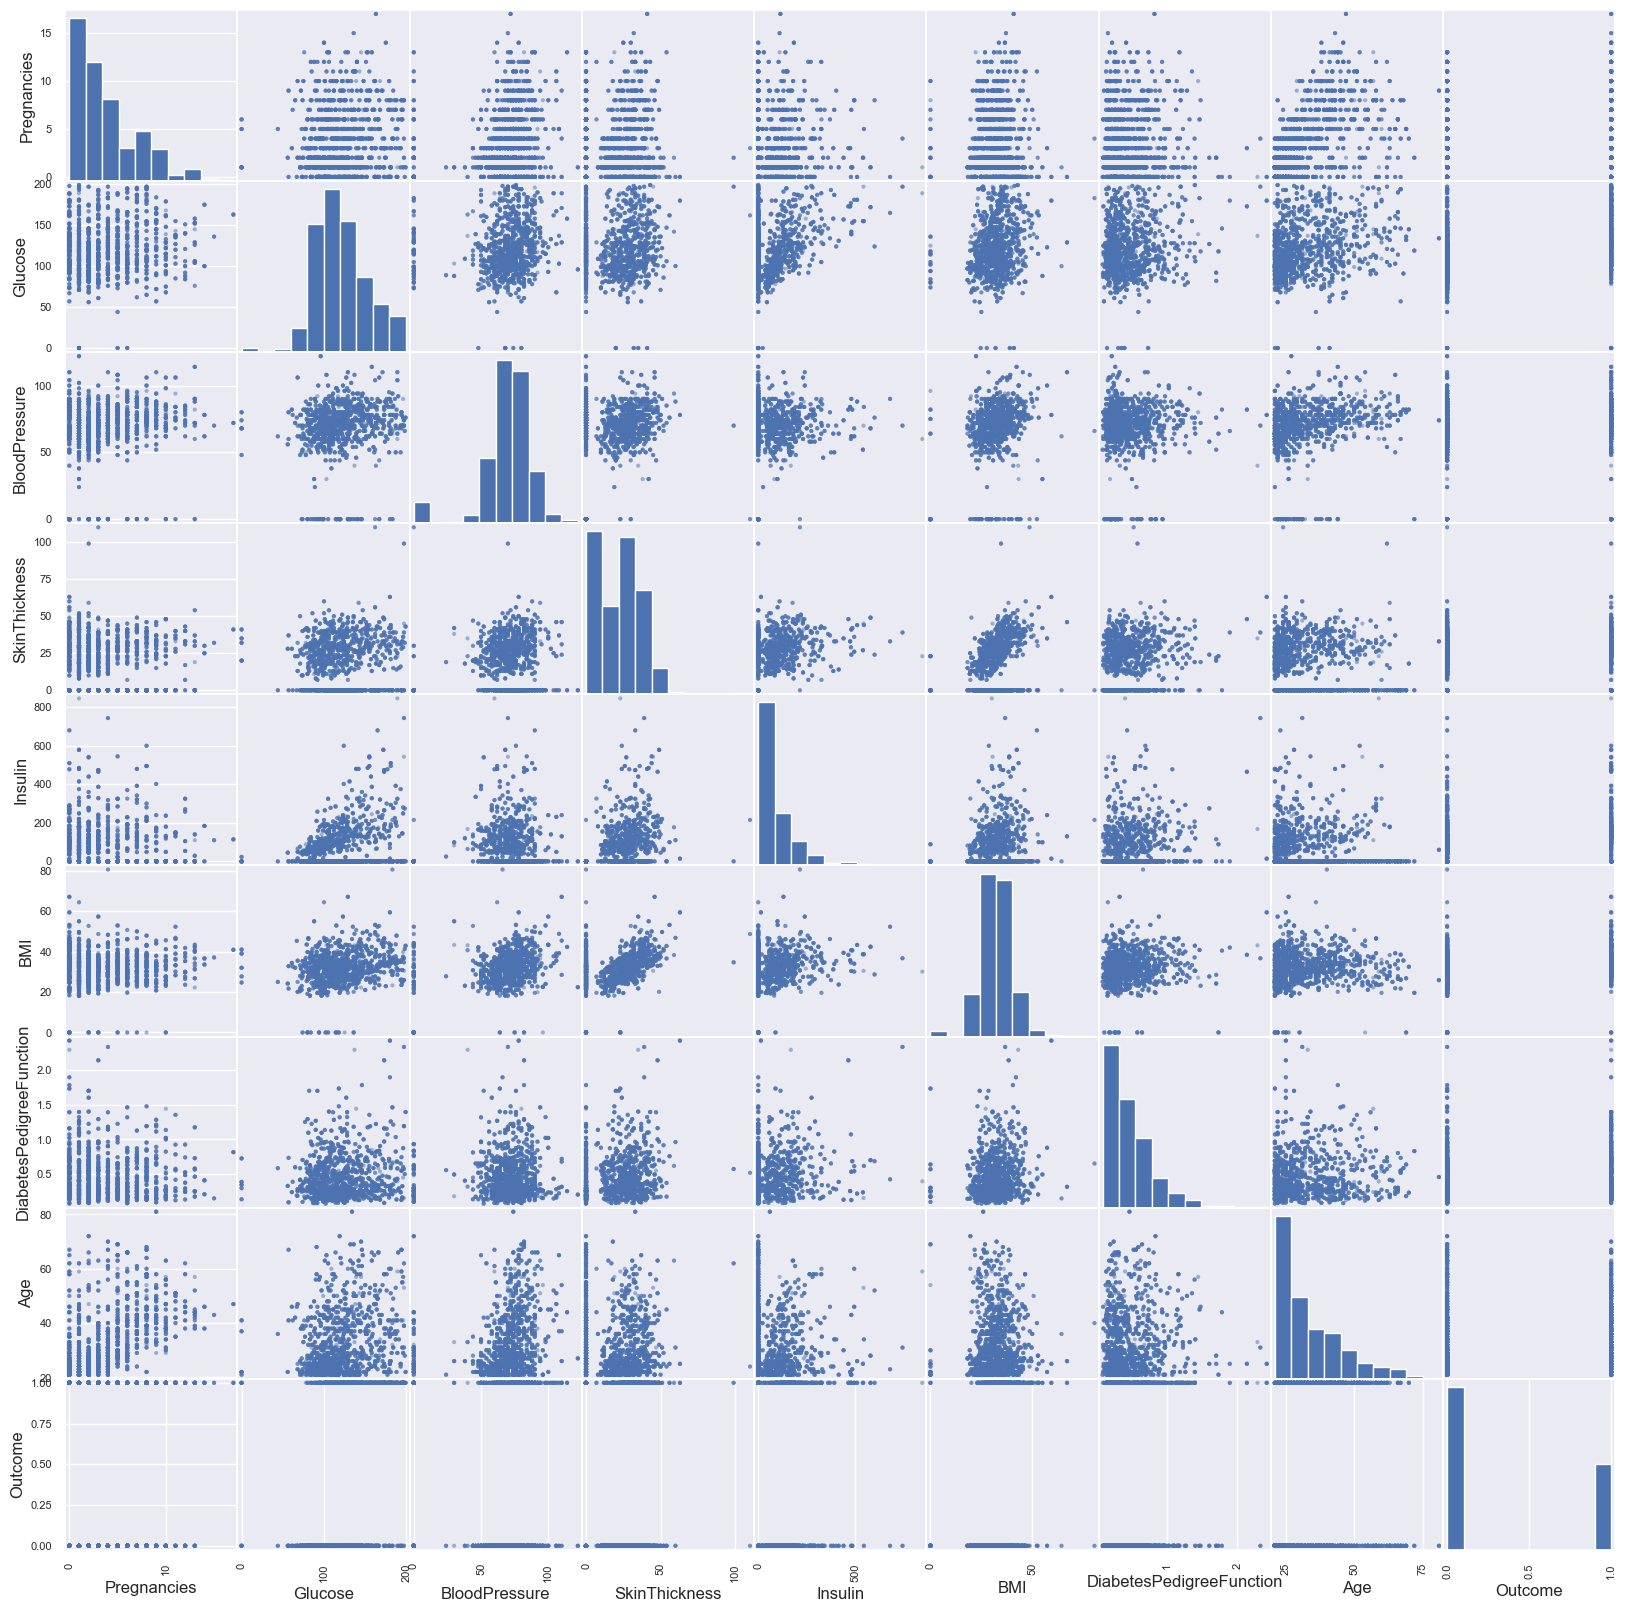

In [17]:
#plotting ascatter matrix of uncleaned dots
p=scatter_matrix(diabetes_df,figsize=(20,20))

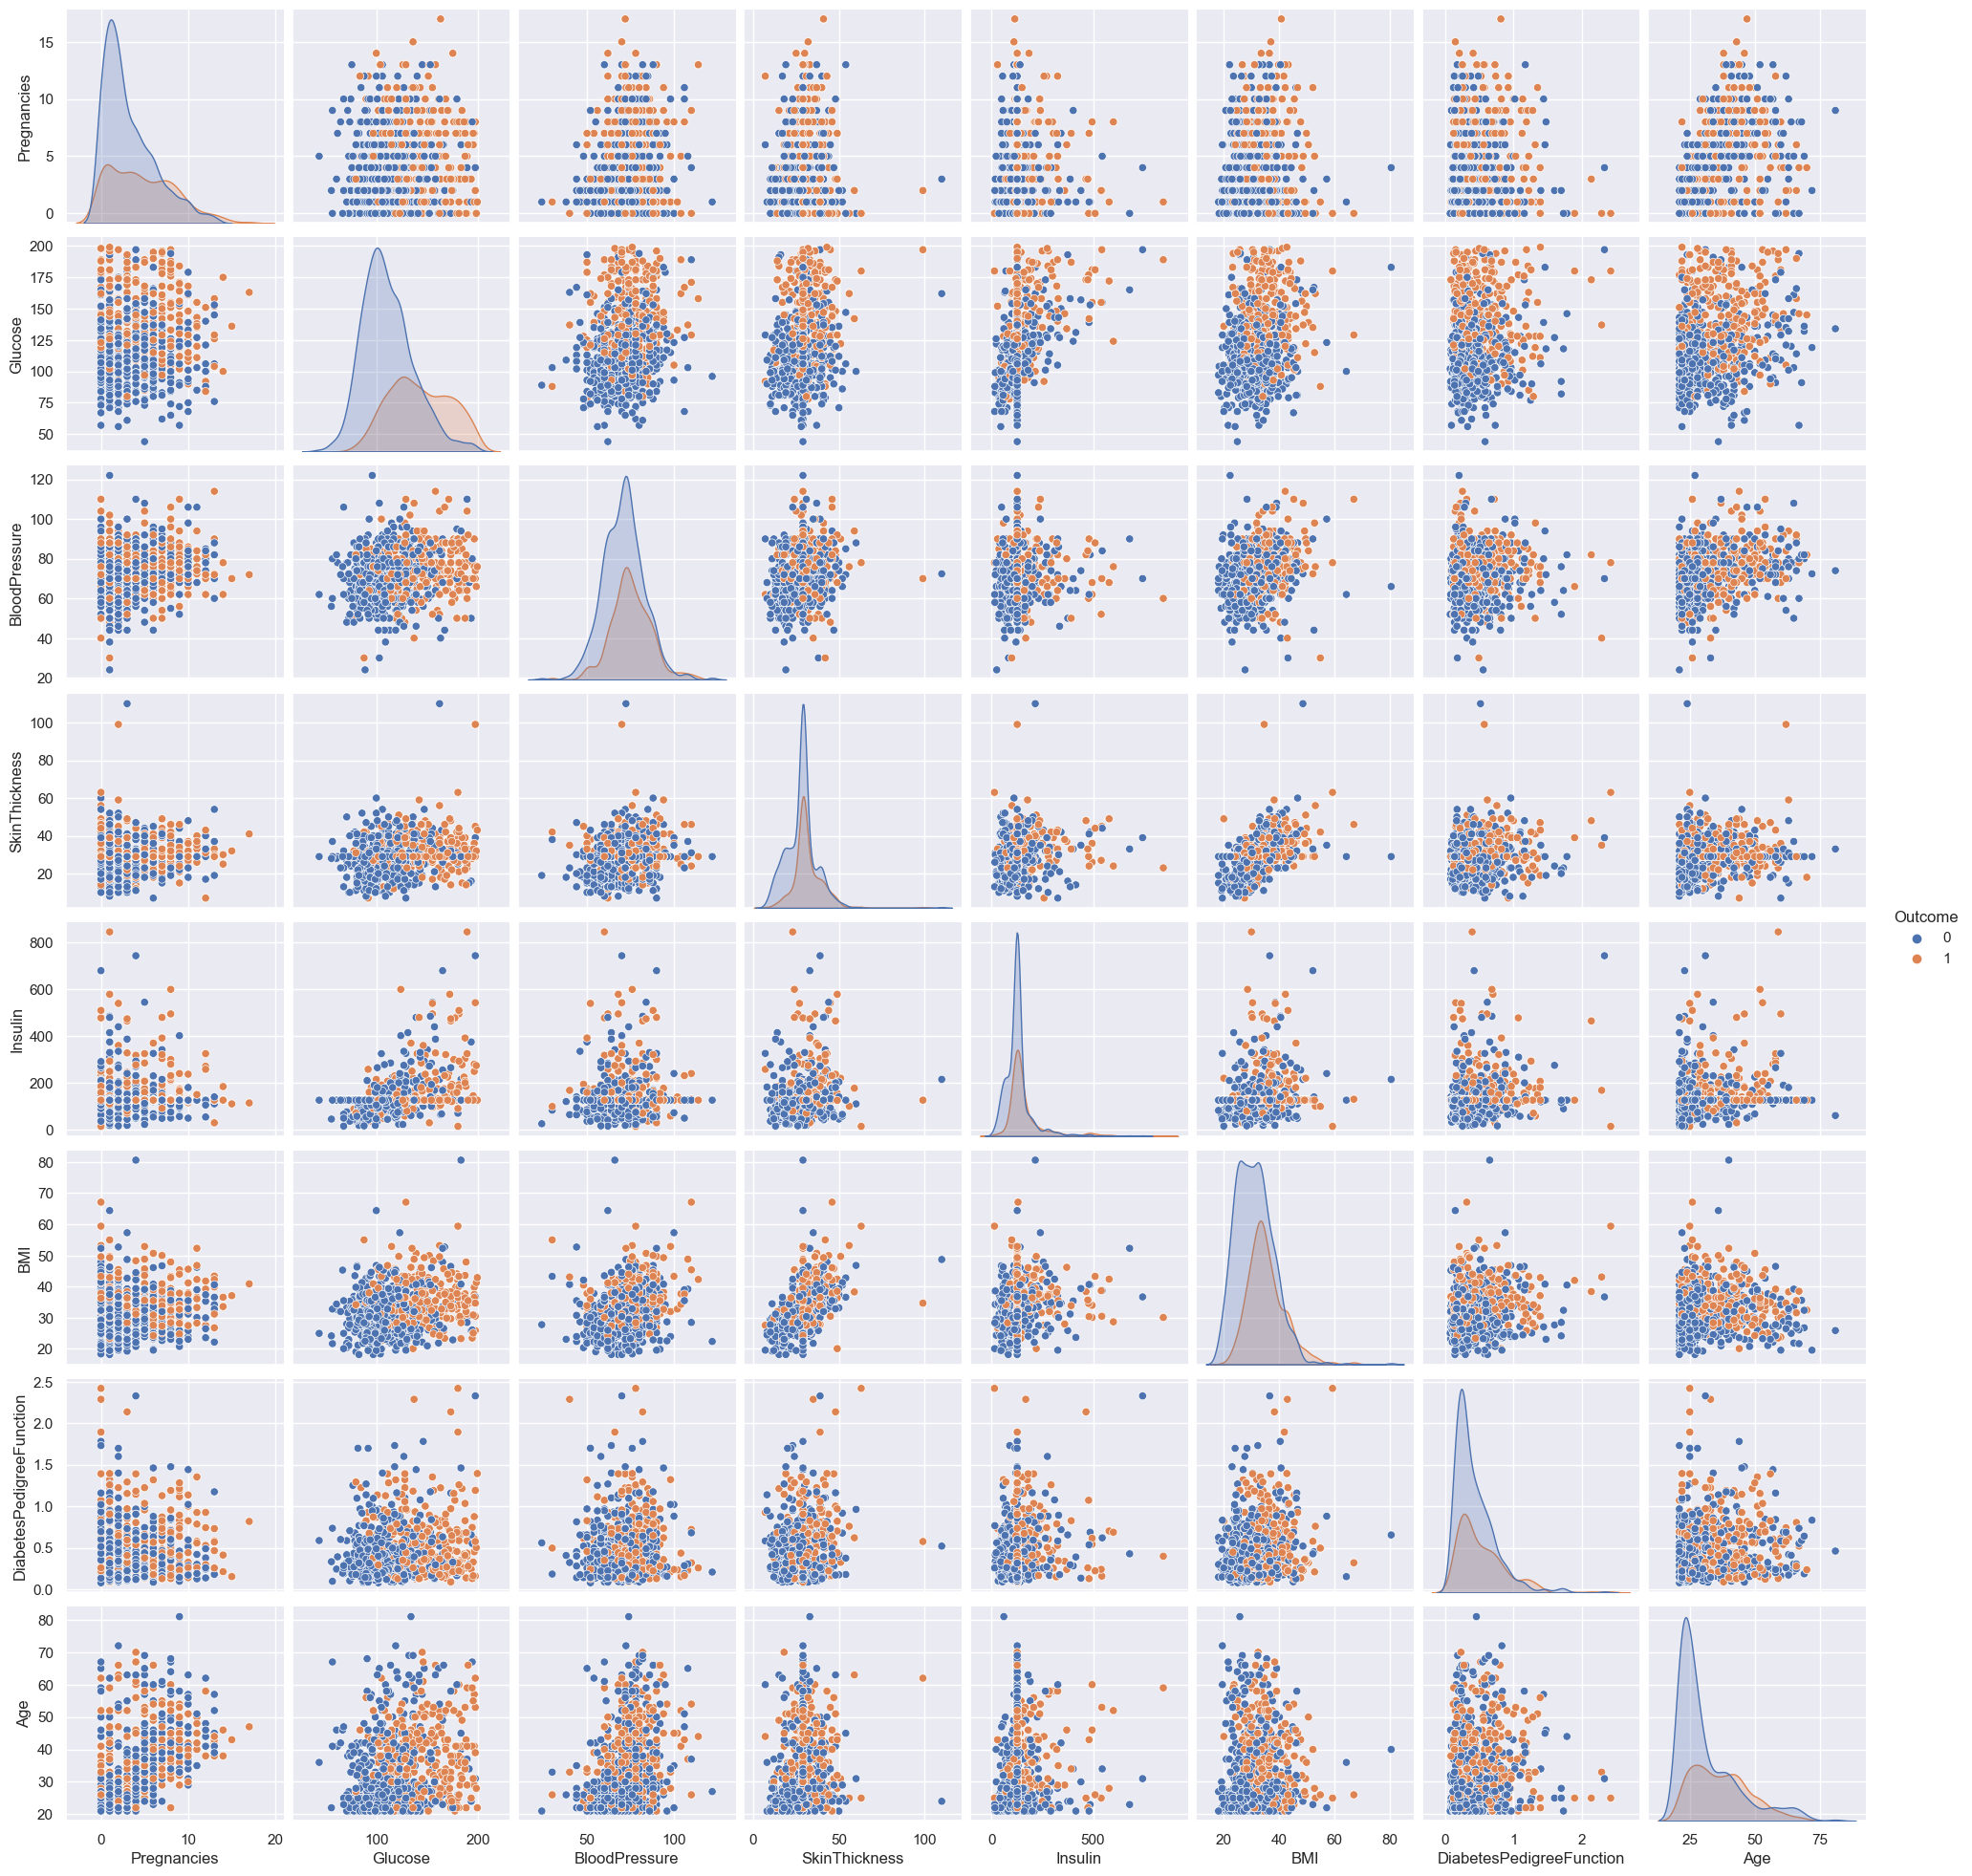

In [18]:
# plotting the pair plots for the data
p=sns.pairplot( diabetes_df_copy, hue='Outcome' )

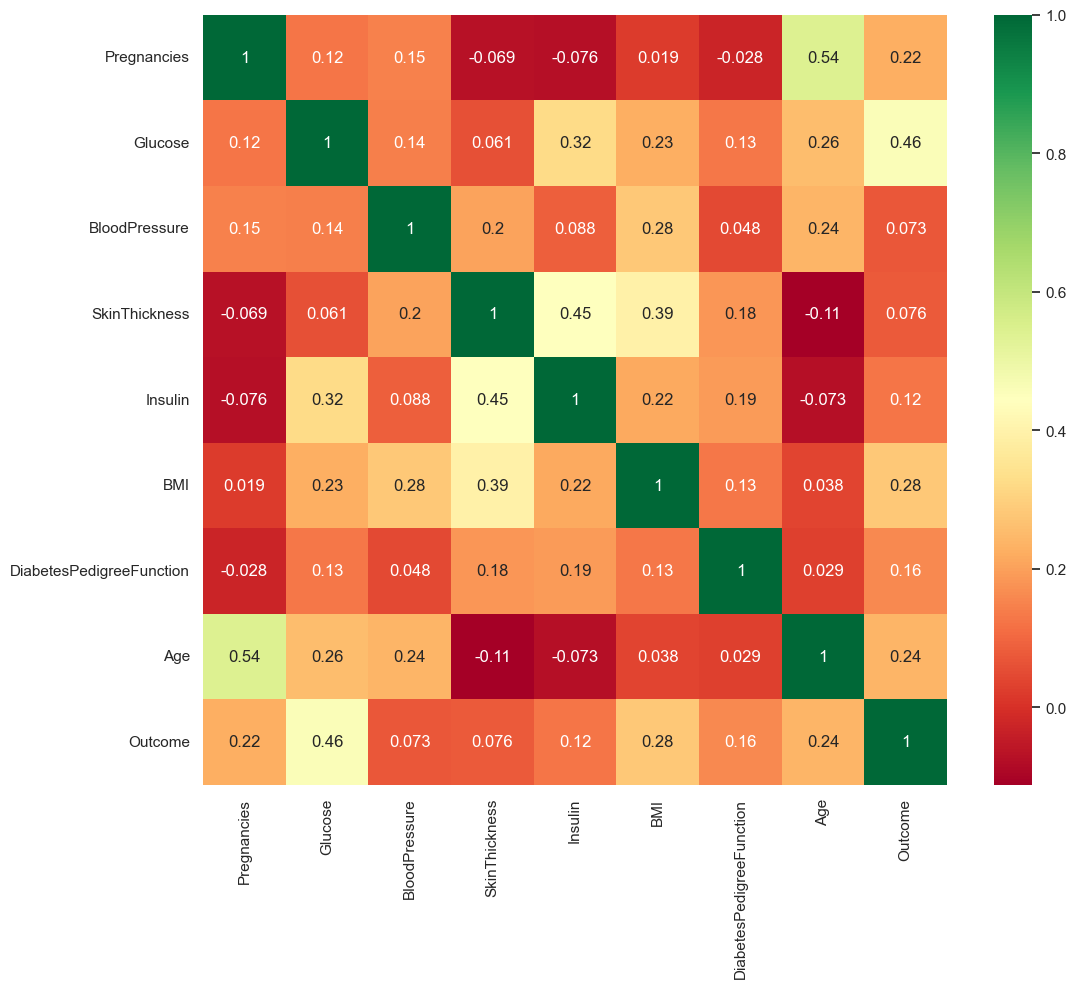

In [19]:
# correlation between all features
#correlation between all the features before cleaning
plt.figure(figsize=(12,10))
p=sns.heatmap(diabetes_df.corr(), annot=True ,cmap='RdYlGn')#seaborn has

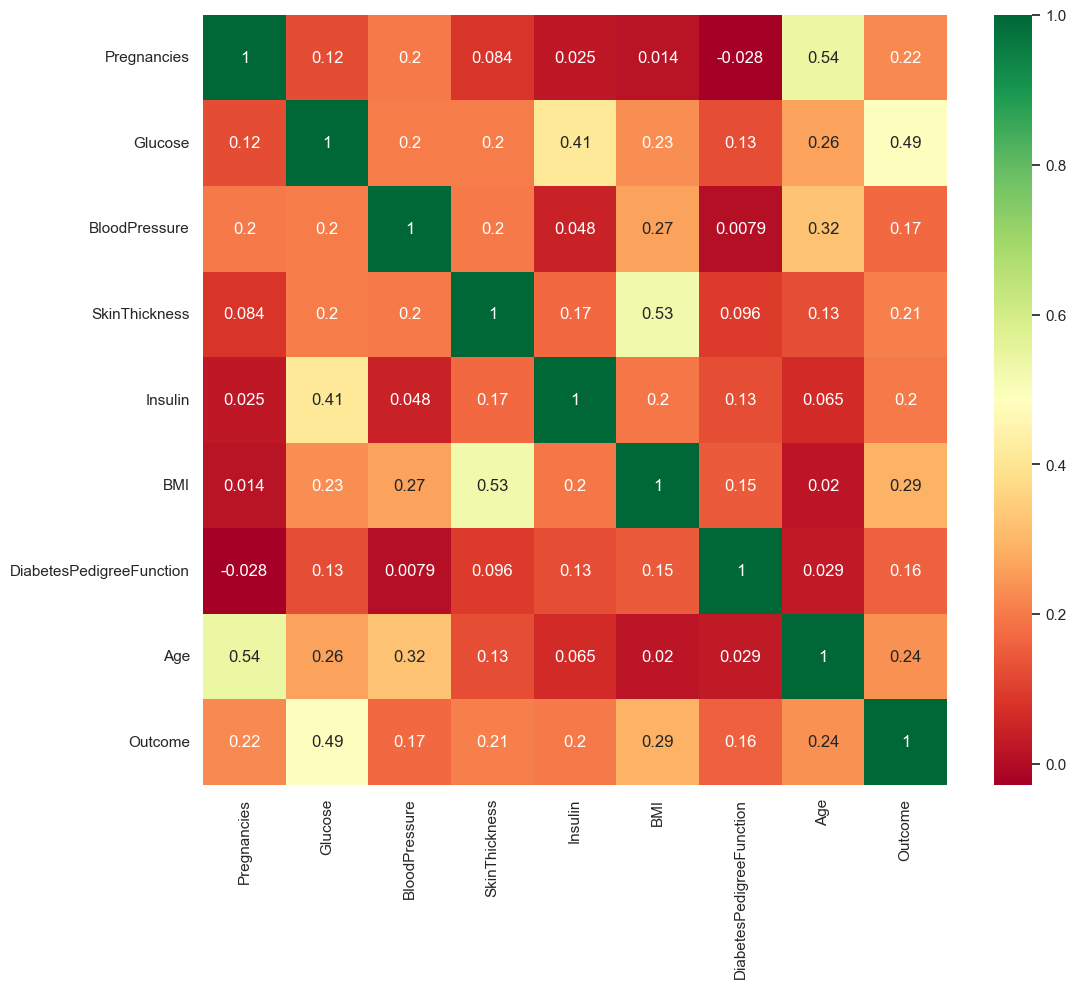

In [20]:
#correlation between all the features after cleaning
plt.figure(figsize=(12,10))
p= sns.heatmap(diabetes_df_copy.corr(), annot=True ,cmap='RdYlGn')

In [21]:
#scaling the data
diabetes_df_copy.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.404086,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0


In [22]:
y=diabetes_df_copy.Outcome

In [23]:
y

0       1
1       0
2       1
3       1
4       0
       ..
2763    0
2764    0
2765    0
2766    1
2767    0
Name: Outcome, Length: 2768, dtype: int64

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Step 1: Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Step 2: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now `X_train`, `X_test`, `y_train`, and `y_test` are defined.


In [25]:
import numpy as np

def train_test_split_2(x, y, test_size=0.2, random_state=None):
    """
    Custom train-test split function.

    Parameters:
    - x: Features (numpy array or pandas DataFrame).
    - y: Labels (numpy array or pandas Series).
    - test_size: Proportion of the dataset to include in the test split (default=0.2).
    - random_state: Random seed for reproducibility (default=None).

    Returns:
    - x_train, x_test, y_train, y_test: Training and testing splits for features and labels.
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    # Shuffle the data
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    
    # Calculate the number of test samples
    n_test_samples = int(len(x) * test_size)
    
    # Split the indices
    test_indices = indices[:n_test_samples]
    train_indices = indices[n_test_samples:]
    
    # Split the data using appropriate indexing
    if hasattr(x, "iloc"):  # If x is a pandas DataFrame
        x_train, x_test = x.iloc[train_indices], x.iloc[test_indices]
        y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]
    else:  # If x is a numpy array
        x_train, x_test = x[train_indices], x[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
    
    return x_train, x_test, y_train, y_test


In [26]:
import numpy as np
import pandas as pd

# Example Data
x = pd.DataFrame({'feature1': range(10), 'feature2': range(10, 20)})
y = pd.Series(range(10))

# Custom train-test split
x_train, x_test, y_train, y_test = train_test_split_2(x, y, test_size=0.3, random_state=42)

print("Training Data:")
print(x_train)
print(y_train)
print("\nTesting Data:")
print(x_test)
print(y_test)


Training Data:
   feature1  feature2
0         0        10
7         7        17
2         2        12
9         9        19
4         4        14
3         3        13
6         6        16
0    0
7    7
2    2
9    9
4    4
3    3
6    6
dtype: int64

Testing Data:
   feature1  feature2
8         8        18
1         1        11
5         5        15
8    8
1    1
5    5
dtype: int64


In [27]:
x_train.shape

(7, 2)

In [28]:
x_train

,feature1,feature2
0,0,10
7,7,17
2,2,12
9,9,19
4,4,14
3,3,13
6,6,16


In [29]:
x_test.shape

(3, 2)

In [30]:
import numpy as np

class LogisticRegression_2:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        """
        Initialize the Logistic Regression model.

        Parameters:
        - learning_rate: The step size for updating weights and bias during gradient descent.
        - n_iterations: The number of iterations for training the model.
        """
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.n_iterations = n_iterations  # Number of iterations for optimization
        self.weights = None  # Weights for the features
        self.bias = None  # Bias term

    def sigmoid(self, z):
        """
        Compute the sigmoid function.

        Parameters:
        - z: A scalar or numpy array.

        Returns:
        - The sigmoid activation for the input z.
        """
        return 1 / (1 + np.exp(-z))  # Sigmoid activation function

    def fit(self, X, y):
        """
        Train the Logistic Regression model using gradient descent.

        Parameters:
        - X: Training data, shape (n_samples, n_features).
        - y: Target values, shape (n_samples,).
        """
        # Number of samples (n_samples) and features (n_features)
        n_samples, n_features = X.shape

        # Initialize weights and bias to zero
        self.weights = np.zeros(n_features)  # Weights initialized to zeros
        self.bias = 0  # Bias initialized to zero

        # Gradient descent
        for _ in range(self.n_iterations):
            # Compute the linear model: X * weights + bias
            linear_model = np.dot(X, self.weights) + self.bias

            # Apply sigmoid function to get predictions
            y_predicted = self.sigmoid(linear_model)

            # Compute gradients (partial derivatives)
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  # Gradient of weights
            db = (1 / n_samples) * np.sum(y_predicted - y)  # Gradient of bias

            # Update weights and bias using the gradients
            self.weights -= self.learning_rate * dw  # Update weights
            self.bias -= self.learning_rate * db  # Update bias

    def predict(self, X):
        """
        Predict class labels for input data.

        Parameters:
        - X: Input data, shape (n_samples, n_features).

        Returns:
        - Predicted class labels, shape (n_samples,).
        """
        # Compute the linear model: X * weights + bias
        linear_model = np.dot(X, self.weights) + self.bias

        # Apply sigmoid function to get probabilities
        y_predicted = self.sigmoid(linear_model)

        # Convert probabilities to class labels (threshold = 0.5)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]

        return np.array(y_predicted_class)  # Return predicted labels as numpy array


In [31]:
classifier_1=LogisticRegression_2()

In [32]:
classifier_1.fit(X_train,y_train)
ypred=classifier_1.predict(X_test)

ValueError: operands could not be broadcast together with shapes (800,) (7,) 